# Data Exploration and Visualisation

Data exploration means a lot of rough analyses, mostly qualitatively. For this, plotting comes handy. We start by importing some packages.

Most likely, importing plotly results in an error:
![](figures/NoPlotly.png)

In this case, change to your terminal, call 
```.sh
conda install plotly
```
and confirm with ```y```

![](figures/Terminal.png)

In this way, you used the conda package manager for the first time!

In [2]:
# Plot library
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# More plot styles
import seaborn as sns
# Clickable d3.js-Plots
import plotly.offline as po

# Plots to appear in notebook
%matplotlib inline

## Analyse Emmas trace

We will once again take a look at Emmas trace, BTW this is Emma:

![Emma at Railway Challenge 2018](figures/EmmaCastle.jpg)

We start onve again by importing the dataset from Amazons Cloud storage.

In [3]:
df = pd.read_json('https://r10f.com/data/emma1000.json')
df.head()

,y,x,z,v
0,47.992597,9.678717,557.519958,-1.0
1,47.992597,9.678717,557.519958,-1.0
2,47.992538,9.678639,561.268433,0.0
3,47.992538,9.678639,561.268433,0.0
4,47.992538,9.678639,562.678432,0.0


For a brief analysis, we use the ```describe()```-Methodd:

In [4]:
df.describe()

,y,x,z,v
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,47.992761,9.679069,554.755151,1.349290
std,0.000315,0.000555,2.376241,0.955252
min,47.992196,9.677698,552.592451,-1.000000
25%,47.992465,9.678720,553.121804,0.290000
50%,47.992756,9.679228,554.343775,1.510000
75%,47.993149,9.679509,555.323952,1.992500
max,47.993192,9.679838,579.272549,3.670000


From the results of ```describe()```, we observe that of course the longitude and latitude do not vary much, it is a park railway in the end. The velocity shows the behaviour as before, with $-1$-entries during startup of the GPS.

We will now proceed to remove the lines with $-1$-entries from the dataframe using ```drop()```. I use ```df[df['v'] == -1].index```to obtain the indices of these lines, to feed to the ```index```-keyword of ```drop()```. It is done inplace in order to speed things up and save memory.

In [5]:
df.drop(index = df[df['v'] == -1].index, inplace=True)
df.head()

,y,x,z,v
2,47.992538,9.678639,561.268433,0.0
3,47.992538,9.678639,561.268433,0.0
4,47.992538,9.678639,562.678432,0.0
5,47.992538,9.678639,562.678432,0.0
6,47.992453,9.678604,563.627529,0.0


## Exercise

Knowing where the data originates from, also the maximum altitude appears questionable, we will consequently drop all values with $z > 560$, which is your exercise.

We can then proceed to plot a velocity histogram with Matplotlib, the most basic plotting library in Python. Try the keywords ```cumulative = True``` and ```density = True``` to obtain a normed cumulative distribution as well as ```bins = 20```.

You may also wish to save the returned arrays, as they tend to be disturbing.

I prefer to use Seaborn for plotting, which accepts all Matplotlib options but looks better. Here we use 

- ```distplot```
- ```plt.title('Velocity')```
- ```plt.savefig('emmavelocity.png', dpi = 600```

to generate a histogram,  add a title and to save the figure as a file. the ```kde = False``` inhibits the generate of a kernel density estimation.

<Figure size 640x480 with 0 Axes>

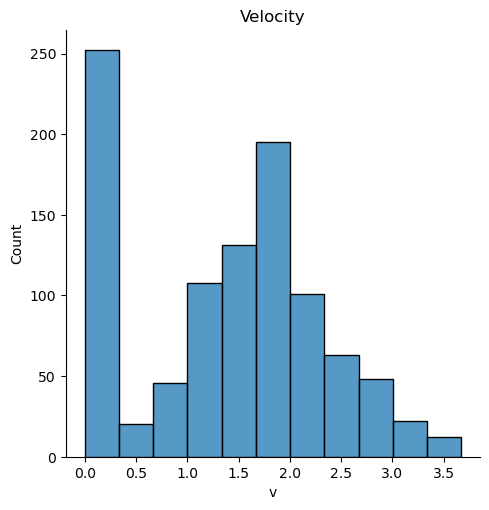

In [6]:
f = plt.figure(111)
ax = sns.displot(df['v'], kde = False)
plt.title('Velocity')
plt.savefig('emmavelocity.png', dpi = 600)

The velocity distribution looks like a typical rail vehicle velocity on a curvy track: with dwell time and a centered distribution around an average.

Next I will introduce you to the plotly library, which enables you to generate clickable html plots of data. The plot opens in a new window. Just try the interface, which comes without any additional effort.

The HTML-figure is also saved in the current folder and be reused without Python.

In [7]:
data = [# Each curve is a dictionary structure
        {'type': 'scatter',
        'y': df['v'],
        'name': 'velocity'},
        {'type': 'scatter',
        'y': df['z']-df['z'].mean(), # Here I remove the mean of the data
        'name': 'Rel. altitude'}
       ]
layout = {"title": 'Emmas velocity'}
fig = dict( data=data, layout=layout )
trash = po.plot(fig, validate=True, filename='emmavelocity.html')

To introduce you to some more plotting option, lets plot the geographic distribution of the data featuring the velocity.

In [8]:
ax = sns.scatterplot(y=df['y'], x=df['x'], alpha = 0.5, hue = df['v'], palette = "RdGn")

ValueError: RdGn is not a valid palette name

## Exercise:

- Load the open data set on platform height and length from: http://download-data.deutschebahn.com/static/datasets/bahnsteig/DBSuS-Bahnsteigdaten-Stand2020-03.csv
- Produce a scatter plot of platform length ('Netto-baulänge (m)') and ('Höhe Bahnsteigkante (cm)"' [sic!])
- Do you find any interesting patterns?
- Can you repeat your findings using ```distplot```to investigate the individual data?

Hint: use ```plt.figure()``` to plot on a new figure.

## Plot beach usage 🏖🏝

Well, actually it's Scharbeutz, but however...

Let's read in the data:

In [8]:
df = pd.read_csv(
    'https://opendatarepo.lsh.uni-kiel.de/data/scharbeutz/Scharbeutz_Strandabschnitt_21-24_2020-11-14.csv',
    sep = ';', # Separator default is ","
    decimal=",") # German decimal separator
df.head()

,timestamp,area,sensor,value
0,14.11.2020 00:00:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
1,14.11.2020 00:01:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
2,14.11.2020 00:02:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
3,14.11.2020 00:03:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
4,14.11.2020 00:04:00,Scharbeutz - Strandabschnitt 21-24,count,0.0


It is quite unhandy that the timestamp is not the index, we can change this using the ```index_col```, ```parse_dates``` and ```infer_datetime_format``` options.

In [9]:
df = pd.read_csv(
    'https://opendatarepo.lsh.uni-kiel.de/data/scharbeutz/Scharbeutz_Strandabschnitt_21-24_2020-11-14.csv',
    sep = ';', # Separator default is ","
    decimal=",",
    index_col = 'timestamp',
    parse_dates = True, # German decimal separator
    dayfirst = True) 
df.head()

,area,sensor,value
timestamp,,,
2020-11-14 00:00:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
2020-11-14 00:01:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
2020-11-14 00:02:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
2020-11-14 00:03:00,Scharbeutz - Strandabschnitt 21-24,count,0.0
2020-11-14 00:04:00,Scharbeutz - Strandabschnitt 21-24,count,0.0


## Exercise:

How is the data distributed over a *November* day?

Plot the data using ```df.plt()``` with kwarg ```rot = 90``` and try some of the ```kind``` options:

    - ‘line’ : line plot (default)
    - ‘hist’ : histogram
    - ‘box’ : boxplot
    - ‘kde’ : Kernel Density Estimation plot
    - ‘density’ : same as ‘kde’
    - ‘area’ : area plot
    - ‘pie’ : pie plot
    - ‘scatter’ : scatter plot
    - ‘hexbin’ : hexbin plot
